In [ ]:
#Name=Shreseja Shrestha
#Id:2408042

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Data Exploration**

In [ ]:
import pandas as pd
#load the dataset
url='/content/drive/MyDrive/AI/waterQuality1.csv'
data=pd.read_csv(url)
data.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


**exploraing number of rows and column**

In [ ]:
#Check dimensions of the Dataframe
print("the dataframe has:",data.shape[0],"rows and ",data.shape[1],"column")

In [ ]:
# Ensure there are no missing values  for the data completeness
missing_values=data.isnull()
print("Missing Values:",missing_values)


In [ ]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


**Correlation analysis**

In [ ]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,...,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225773,0.046783,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,...,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123362
barium,0.294145,0.070099,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,...,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090858
cadmium,-0.099911,-0.006422,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,...,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256034
chloramine,0.369309,0.104775,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,...,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186704
chromium,0.353218,0.124782,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,...,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182306
copper,0.168612,0.015953,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,...,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029498
flouride,-0.009784,-0.028221,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,...,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006550
bacteria,-0.078238,0.063603,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,...,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022077


In [ ]:
data.shape

(7999, 21)

**Bar-PLot**

**Plotting the classification of target variable**

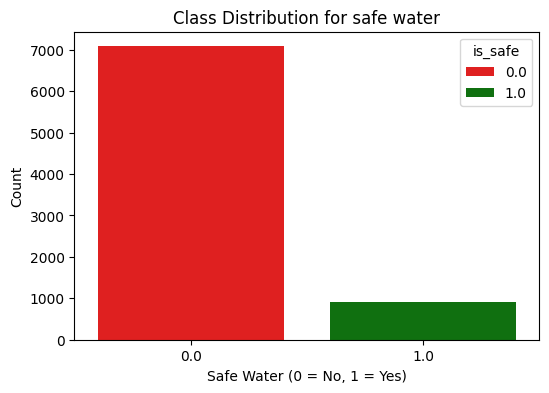

 Class Proportions of target Variable:
is_safe
0.0    0.885943
1.0    0.114057
Name: proportion, dtype: float64


In [ ]:
# Plot the class distribution for safe water

plt.figure(figsize=(6, 4))
sns.countplot(x=data["is_safe"], hue=data["is_safe"],palette=["red", "green"])
plt.xlabel("Safe Water (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Class Distribution for safe water")
plt.show()

# Print class proportions
print(" Class Proportions of target Variable:")
print(data["is_safe"].value_counts(normalize=True))


In [ ]:
all_features=[
    'aluminium',
    'ammonia',
    'lead',
    'nitrates',
    'nitrites',
    'mercury',
    'perchlorate',
    'arsenic',
    'radium',
    'selenium',
    'silver'
]

Computing correlation of all features with the target variable

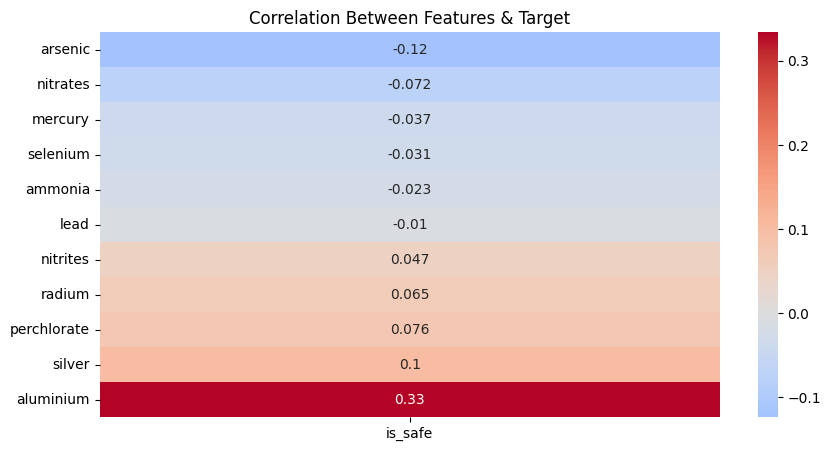

In [ ]:
correlation=data[all_features+["is_safe"]].corr()["is_safe"].sort_values();
# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation[:-1].to_frame(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Features & Target")
plt.show()


***Taking the eight features with higher absolute value with water_quality for further prediction**

In [ ]:
selected_feature=[
    "aluminium","copper","bacteria","lead","radium"

]

Outlier Detection

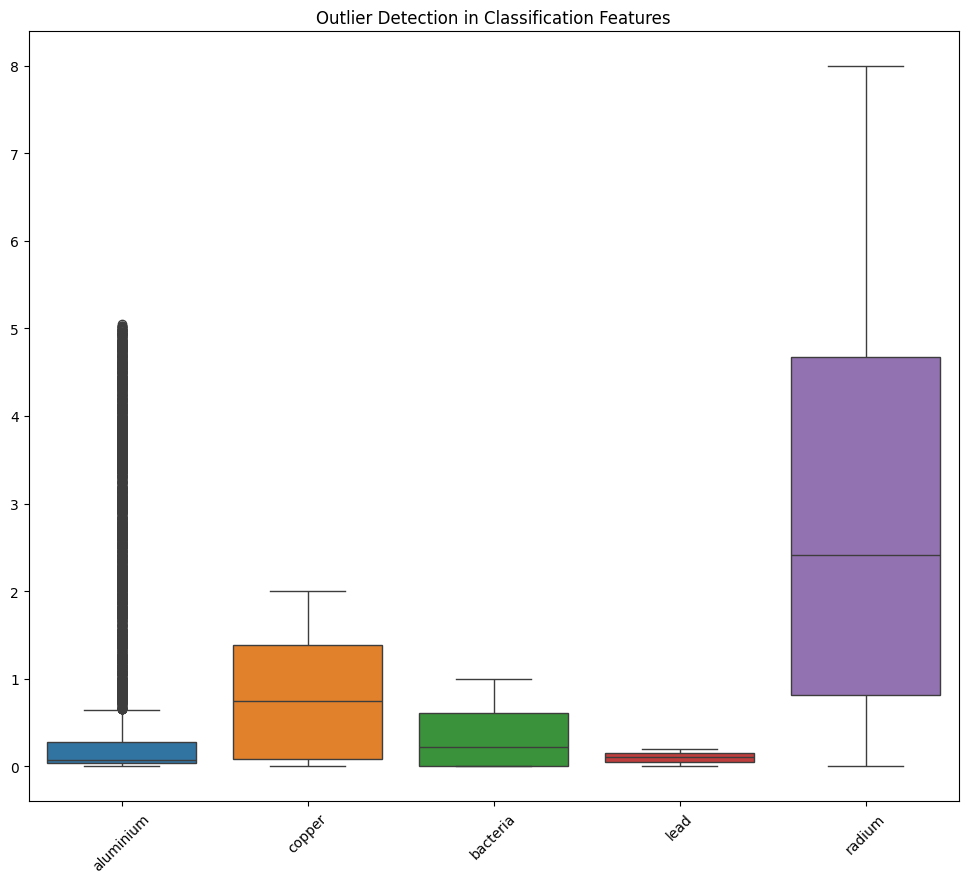

In [ ]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=data[selected_feature])
plt.xticks(rotation=45)
plt.title("Outlier Detection in Classification Features")
plt.show()


**Histogram**

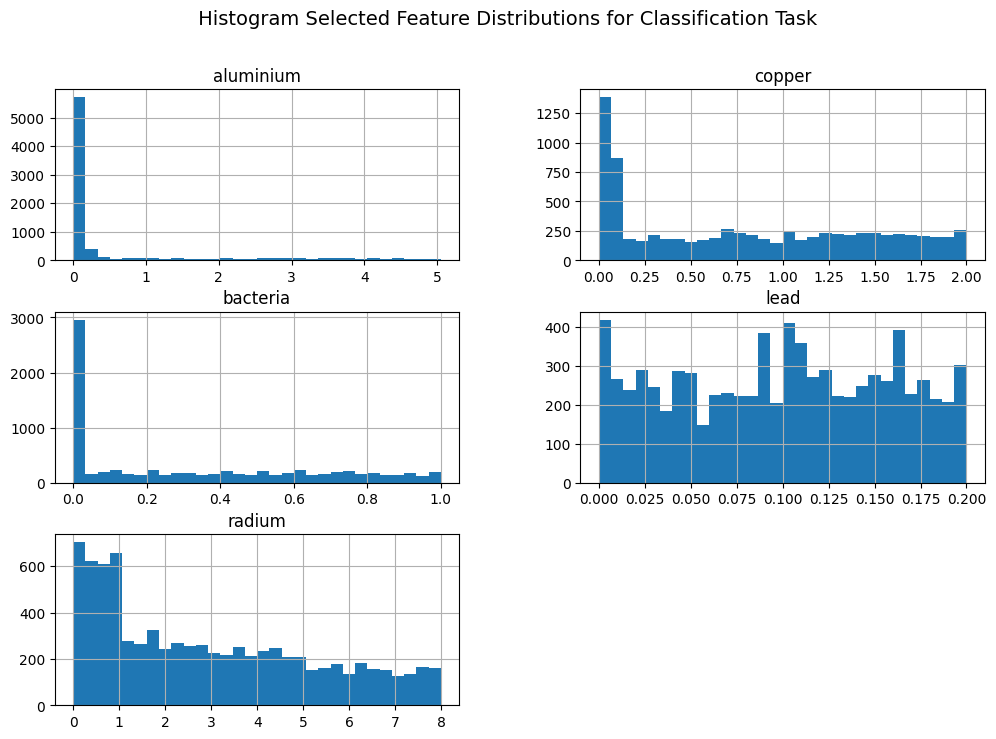

In [ ]:
data[selected_feature].hist(bins=30, figsize=(12, 8))
plt.suptitle(" Histogram Selected Feature Distributions for Classification Task", fontsize=14)
plt.show()

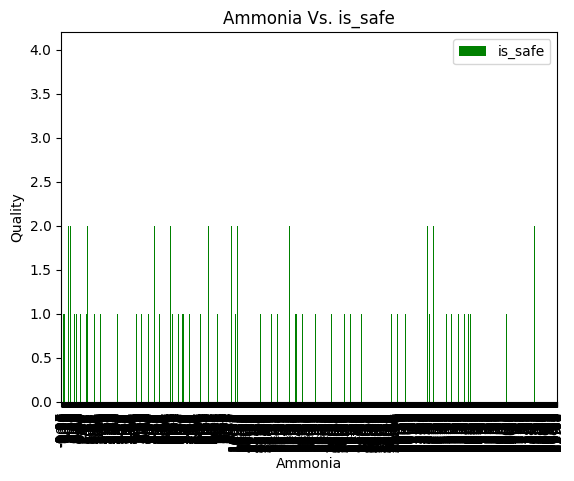

In [ ]:
# Aggregate the data, ensuring 'ammonia' is treated as numeric
aggregated_data = data.groupby(pd.to_numeric(data['ammonia'], errors='coerce'))['is_safe'].sum().reset_index()

# Convert 'ammonia' to numeric in the aggregated DataFrame if necessary
aggregated_data['ammonia'] = pd.to_numeric(aggregated_data['ammonia'], errors='coerce')

# Now plot
aggregated_data.plot(kind='bar', x="ammonia", y="is_safe", color="green")
plt.title("Ammonia Vs. is_safe")
plt.xlabel("Ammonia")
plt.ylabel("Quality")
plt.show()

Scatter plot

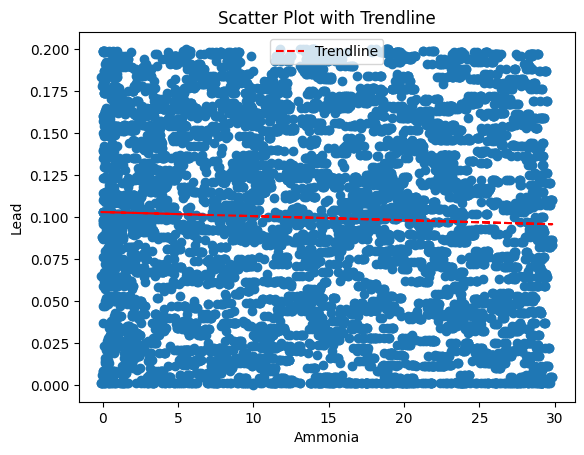

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Handle potential non-numeric values in 'ammonia' and 'lead' columns
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['lead'] = pd.to_numeric(data['lead'], errors='coerce')

# Remove rows with NaN values in 'ammonia' or 'lead'
data = data.dropna(subset=['ammonia', 'lead'])

# Calculate the best-fitted line (trendline)
slope, intercept = np.polyfit(data['ammonia'], data['lead'], 1)
trendline = slope * data['ammonia'] + intercept  # Use original 'ammonia' values for plotting

# Create the scatter plot
plt.scatter(data['ammonia'], data['lead'])

# Plot the trendline
plt.plot(data['ammonia'], trendline, 'r--', label='Trendline')

# Add labels and title
plt.xlabel('Ammonia')
plt.ylabel('Lead')
plt.title('Scatter Plot with Trendline')
plt.legend()  # Show legend to identify the trendline

# Show the plot
plt.show()

#**BUILIDING A MODEL FROM SCRATCH**

**Binary classification with Logistic Regression**

**Sigmoid Function**

In [ ]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  # Your Code here
  y = 1/(1+np.exp(-x))
  return y
# Test Function:
# For scalar:
x = 0
y = logistic_function(x)
print(f"logistic({x}) = {logistic_function(x)}")
# For Array:

x_arr = np.array([-3, -1, 1, 3])
y_arr = logistic_function(x_arr)
print(f"logistc({x_arr}) = {logistic_function(x_arr)}")


logistic(0) = 0.5
logistc([-3 -1  1  3]) = [0.04742587 0.26894142 0.73105858 0.95257413]


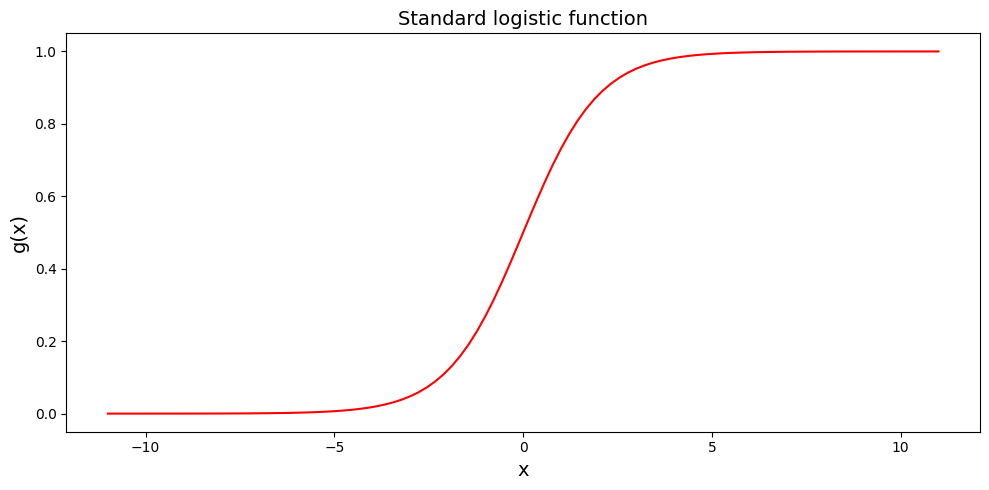

In [ ]:
#Plotting the sigmoid function
plt.figure(figsize = (10, 5))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic_function(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()


In [ ]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  loss =-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

  return loss



Cost Function

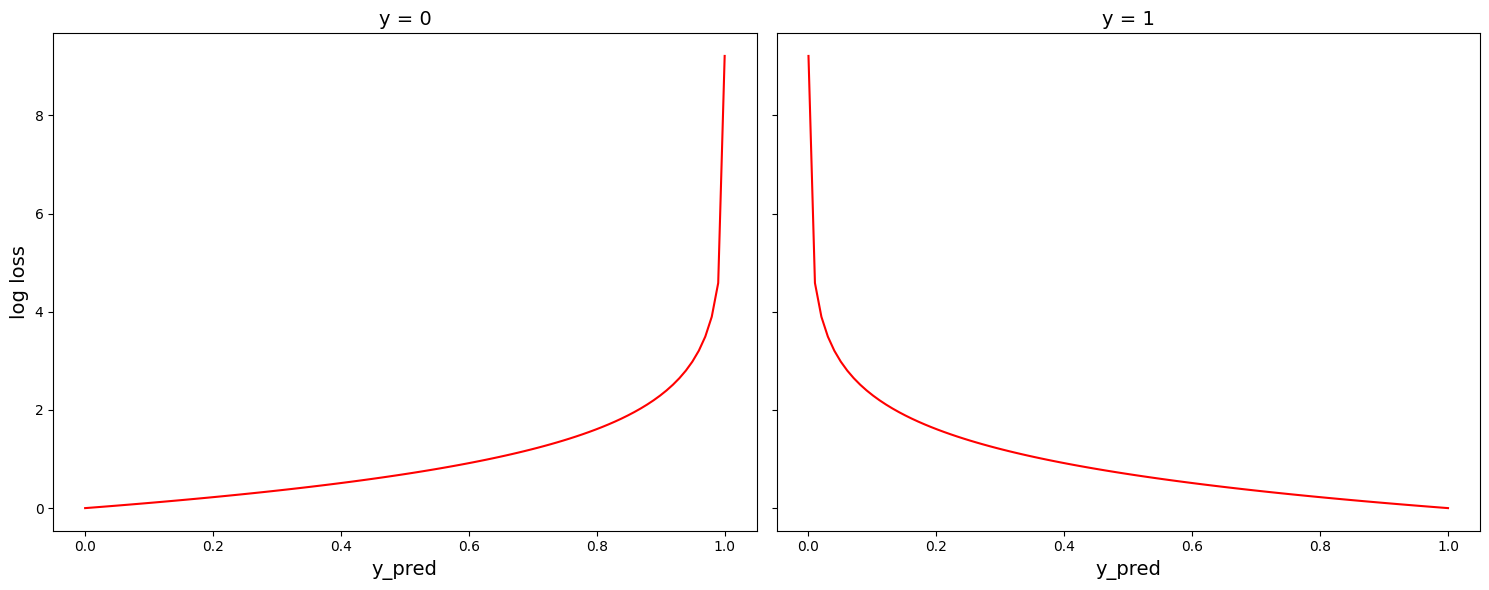

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, log_loss(0, y_pred), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, log_loss(1, y_pred), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
#Cost Function

def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec =log_loss(y_true,y_pred)
    cost =np.sum(loss_vec)/n
    return cost

y_true, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_function({y_true}, {y_pred}) = {cost_function(y_true, y_pred)}")

cost_function([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


Extending the cost function for logistic regression to be used with model parameters.

Function we are estimating:

In [ ]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z= X.dot(w)+b
    y_pred=logistic_function(z)
    error=y_pred-y
    grad_w = 1/m* error.dot(X)
    grad_b = 1/m*(sum(error))
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"gradient of logistic regression parameters (X = {X}, y = {y}, w = {w}, b = {b}) = {compute_gradient(X, y, w, b)}")



gradient of logistic regression parameters (X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [ ]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = X.dot(w)+b
    y_pred =logistic_function(z)
    cost = cost_function(y,y_pred)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [ ]:
# Gradient descent algorithm for logistic regression
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False):
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    from tqdm.contrib import itertools
    import math
    import tqdm
    from time import sleep
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w += -alpha*grad_w
        b += -alpha*grad_b
        y_pred=X.dot(w)+b
        cost = costfunction_logreg(X,y,w,b)
        cost_history.append(cost)
        params_history.append([w, b])


    return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost = False, show_params = False)

  0%|          | 0/100000 [00:00<?, ?it/s]

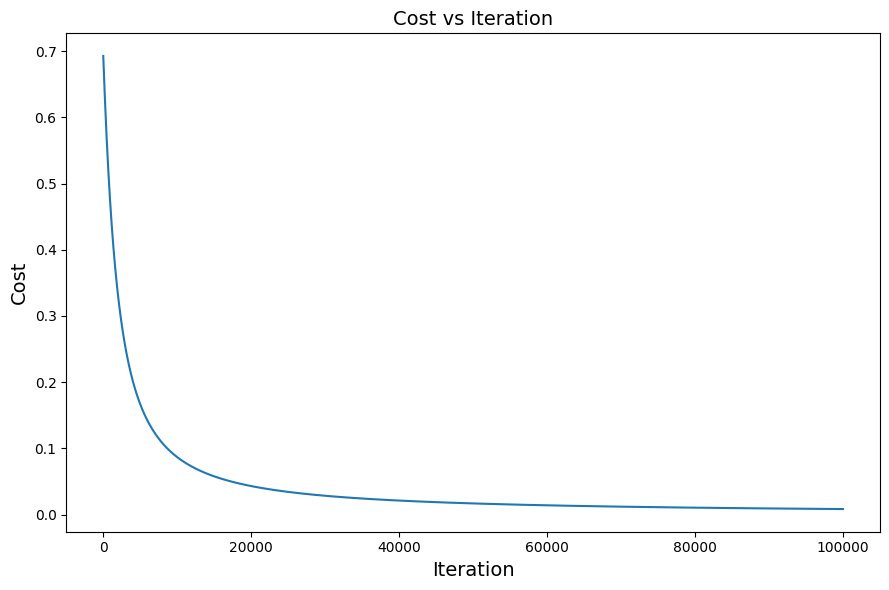

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

**Logistic Regression Scratch Implmentation**

In [ ]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [ ]:
print(data.shape)

(7996, 21)


In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,:-1].values
print(x)
print(y)

[[1.650e+00 9.080e+00 4.000e-02 ... 8.000e-02 3.400e-01 2.000e-02]
 [2.320e+00 2.116e+01 1.000e-02 ... 8.000e-02 2.700e-01 5.000e-02]
 [1.010e+00 1.402e+01 4.000e-02 ... 7.000e-02 4.400e-01 1.000e-02]
 ...
 [9.000e-02 6.850e+00 0.000e+00 ... 0.000e+00 4.000e-02 5.000e-02]
 [1.000e-02 1.000e+01 1.000e-02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.000e-02 6.850e+00 1.000e-02 ... 0.000e+00 4.000e-02 5.000e-02]]
[[1.650e+00 9.080e+00 4.000e-02 ... 8.000e-02 3.400e-01 2.000e-02]
 [2.320e+00 2.116e+01 1.000e-02 ... 8.000e-02 2.700e-01 5.000e-02]
 [1.010e+00 1.402e+01 4.000e-02 ... 7.000e-02 4.400e-01 1.000e-02]
 ...
 [9.000e-02 6.850e+00 0.000e+00 ... 0.000e+00 4.000e-02 5.000e-02]
 [1.000e-02 1.000e+01 1.000e-02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.000e-02 6.850e+00 1.000e-02 ... 0.000e+00 4.000e-02 5.000e-02]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate features (X) and target(Y)
x=data.drop(columns=["is_safe"]).values
y=data["is_safe"].values

# Split the data into training and testing sets
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#output
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6396, 20)
X_test shape: (1600, 20)
y_train shape: (6396,)
y_test shape: (1600,)


In [ ]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled.shape

(1600, 20)

In [ ]:
#Sanity Check
if X_train_scaled.shape[0]==y_train.shape[0]:
  print("Sanity Check Passed")
else:
  print("Sanity Check Failed")

Sanity Check Passed


#**MODEL FITTING**

**Traninig of the mode**

In [ ]:
w_init=np.zeros(X_train.shape[1])
b_init=-1
w_out, b_out, cost_history, params_history = gradient_descent(X_train_scaled, y_train,w= w_init, b=b_init, alpha=0.1,show_cost = False, n_iter=2000,show_params = False)

  0%|          | 0/2000 [00:00<?, ?it/s]

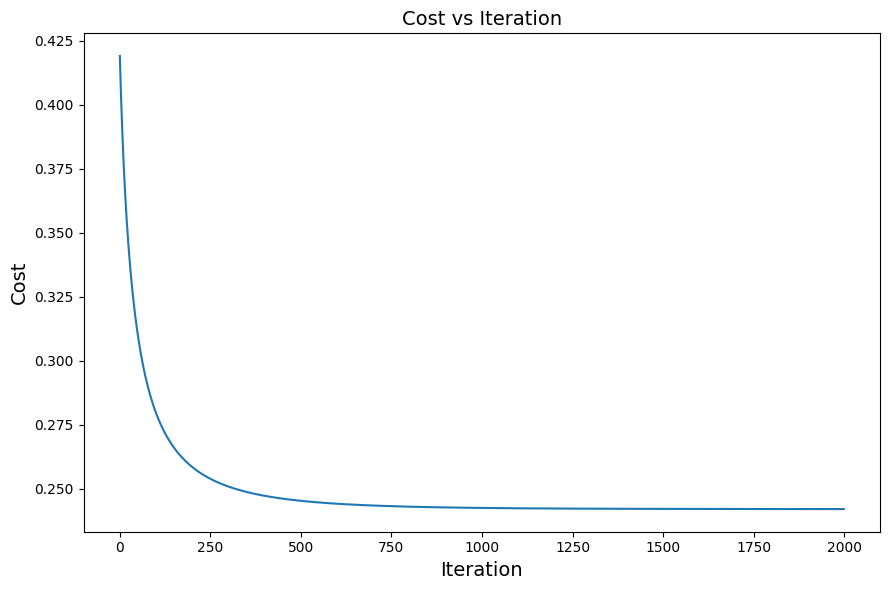

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
def prediction(x_test, w_out, b_out):
  """
  Computes the prediction for given test values.
  Arguments: Inputs
  x_test (nd array): Array of Test Independent variables.
  w_out (nd array): Array of weights learned via gradient descent.
  b_out (nd array) Array of bias learned via gradiebt descent.
  Arguments: Output
  y_pred (nd arrray): Array of Predicted dependent Variables.
  """
  y_test_prob = logistic_function(np.matmul(X_test_scaled, w_out) + (b_out * np.ones(x_test.shape[0])))
  y_pred = []
  for i in y_test_prob:
    if i>0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred


# y_pred = (y_test_prob > 0.5).astype(int)

y_pred = prediction(X_test, w_out, b_out)
y_pred = np.array(y_pred)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0., 0., 1., ..., 0., 0., 0.])

Confusion Matrix:
[[1378   22]
 [ 134   66]]
TP: 66, FP: 22, FN: 134, TN: 1378


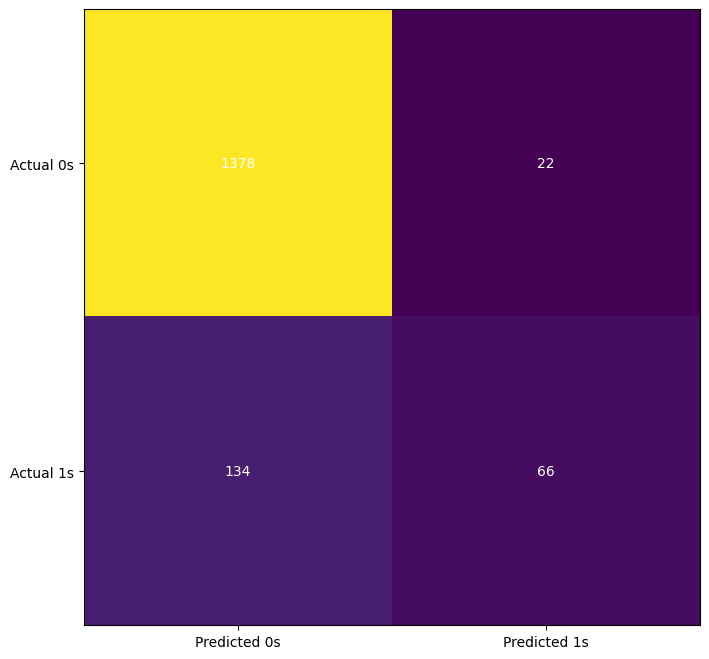

In [ ]:

#Confusion matrix calculation
cm = confusion_matrix(y_test, y_pred)
  # Extract TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()
  # Print the confusion matrix with labels
print(f"Confusion Matrix:\n{cm}")
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
#plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1400
         1.0       0.75      0.33      0.46       200

    accuracy                           0.90      1600
   macro avg       0.83      0.66      0.70      1600
weighted avg       0.89      0.90      0.89      1600



**ROC CURVE AND AUC**

In [ ]:
y_train

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
y_true

array([0, 1, 0])

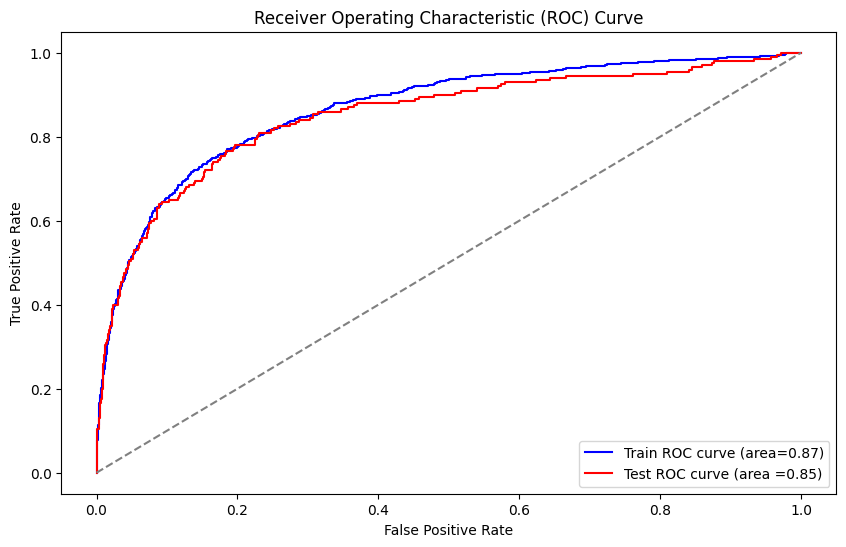

In [ ]:
from sklearn.metrics import roc_curve, auc


# Recalculate AUC values (using matrix multiplication with @ operator)
fpr_train, tpr_train, _ = roc_curve(y_train, logistic_function(np.dot(X_train_scaled ,w_out )+ b_out))
fpr_test, tpr_test, _ = roc_curve(y_test, logistic_function(np.dot(X_test_scaled , w_out) + b_out))
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve (rest of the code remains the same)
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (area={roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area ={roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**BUILDING A PRIMARY MODEL**

**Model1:Logistic regression**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Train The Scikit-Learn Logistic regression and random Forest**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("Both model trained sucessfully")

Both model trained sucessfully


#**BOTH MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n {model_name} Performance:")
    print(f"    Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"    Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"    Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"    F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"    Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_logreg)

# Evaluate Random Forest
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)



 Logistic Regression Performance:
    Accuracy: 0.9025
    Precision: 0.7500
    Recall: 0.3300
    F1-Score: 0.4583
    Confusion Matrix:
[[1378   22]
 [ 134   66]]

 Random Forest Classifier Performance:
    Accuracy: 0.9606
    Precision: 0.9724
    Recall: 0.7050
    F1-Score: 0.8174
    Confusion Matrix:
[[1396    4]
 [  59  141]]


#**Hyper-Parameter Optimizations With Cross validation for RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required per leaf
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print(" Best Hyperparameters:", grid_search.best_params_)

# Train final model with best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)


# Predictions with optimized model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate tuned Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Evaluate tuned Random Forest
evaluate_model("Tuned Random Forest", y_test, y_pred_best_rf)


 Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

 Tuned Random Forest Performance:
Accuracy: 0.8750
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[1400    0]
 [ 200    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Selection for Random Forest Classifier

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
feature_names=data.drop(columns=["is_safe"]).columns
rf_clf = RandomForestClassifier(random_state=42)
# Get feature importances from the trained Random Forest model
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": rf_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="Set2")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Classifier")
plt.show()

# Display the DataFrame with feature importance scores
print(" Feature Importance Scores:\n", feature_importance_df)


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required per leaf
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters found
print(" Best Hyperparameters:", grid_search.best_params_)

# Train final model with best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions with optimized model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate tuned Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n {model_name} Performance:")
    print(f"   Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"   Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"   Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"   F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"   Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Evaluate tuned Random Forest
evaluate_model("Tuned Random Forest", y_test, y_pred_best_rf)


 Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

 Tuned Random Forest Performance:
   Accuracy: 0.9575
   Precision: 0.9714
   Recall: 0.6800
   F1-Score: 0.8000
   Confusion Matrix:
[[1396    4]
 [  64  136]]


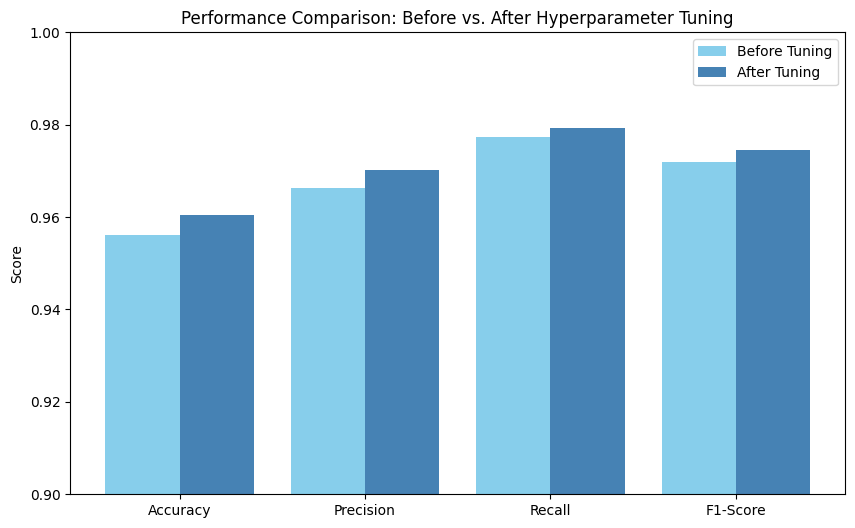

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics before and after tuning
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
before_tuning = [0.9561, 0.9664, 0.9774, 0.9719]
after_tuning = [0.9605, 0.9701, 0.9792, 0.9746]

x = np.arange(len(metrics))  # Label positions

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, before_tuning, width=0.4, label="Before Tuning", color="skyblue")
plt.bar(x + 0.2, after_tuning, width=0.4, label="After Tuning", color="steelblue")

# Label formatting
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
plt.title("Performance Comparison: Before vs. After Hyperparameter Tuning")
plt.legend()
plt.show()


In [ ]:
# Evaluate the final model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Select the topfeatures
selected_feature=[    "aluminium","copper","bacteria","lead","radium"
]
X_train_top = X_train_scaled[:, [all_features.index(f) for f in selected_feature]]
X_test_top = X_test_scaled[:, [all_features.index(f) for f in selected_feature]]

# Rebuild Random Forest with best hyperparameters
best_rf_clf = RandomForestClassifier(

    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf_clf.fit(X_train_top, y_train)
y_pred_best_rf = best_rf_clf.predict(X_test_top)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)

print("Final Model Performance:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1 Score: {f1_best_rf:.4f}")
print((f"ROC AUC: {roc_auc_best_rf:.4f}"))

NameError: name 'X_train_scaled' is not defined